# Module 1 - Wrap-Up Quiz

## Importing Pandas

In [1]:
import pandas as pd

## Loading Dataset

In [2]:
ames_housing = pd.read_csv("../datasets/ames_housing_no_missing.csv")

target_name = "SalePrice"
data, target = ames_housing.drop(columns=target_name), ames_housing[target_name]

We did not encounter any regression problem yet. Therefore, we convert the regression target into a classification target to predict whether or not an house is expensive. "Expensive" is defined as a sale price greater than $200,000.

In [5]:
target = (target > 200_000).astype(int)

## EDA

Use the data.info() and data.head() commands to examine the columns of the dataframe. The dataset contains:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal


The "Dtype" column gives information of the data type. We observe three different data types: "object", "int64", and "float64".

"float64" columns typically represent numerical data. "object" columns usually store string labels for categorical values. "int64" can either represent numerical quantitities or categorical codes. The actual meaning depends and one would often need to look at the actual values of the first lines or at the dataset documentation to make sure whether this column should be treated as a numerical or categorical quantity.

Therefore this dataset has both numerical (e.g. "LotFrontage") and categorical (e.g. "BldgType") features.

How many features are available to predict whether or not a house is expensive ?

In [7]:
data.shape

(1460, 79)

From the original dataframe, we should exclude the column "SalePrice" because it corresponds to the target that we want to predict.

The resulting dataframe named "data" has 79 columns as seen with the `data.shape` attribute or by measuring `len(data.columns)` for instance.

How many features are represented with numbers?

In [9]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)
numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

print(len(numerical_columns))

36


Another way is to select columns corresponding to data type `int64` and `float64`. The following code will filter these columns:

In [6]:
data_numbers = data.select_dtypes(["integer", "float"])
data_numbers.info()
len(data_numbers.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

36

Refer to the [dataset description](https://www.openml.org/search?type=data&sort=runs&id=42165&status=active) regarding the meaning of the dataset.

Among the following columns, which columns express a quantitative numerical value (excluding ordinal categories)?

"OverallQual" and "OverallCond" are ordinal categorical variables. While technically "YearBuilt" is more a date than a quantity, it is fine for machine learning models to treat it as a quantity because the year of construction is directly related to the age of the house.

We consider the following numerical columns:

In [3]:
numerical_features = [
  "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
  "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
  "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
  "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
  "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

Now create a predictive model that uses these numerical columns as input data. Your predictive model should be a pipeline composed of a sklearn.preprocessing.StandardScaler to scale these numerical data and a sklearn.linear_model.LogisticRegression.

What is the accuracy score obtained by 10-fold cross-validation (you can set the parameter cv=10 when calling cross_validate) of this pipeline?

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression())

cv_results_num = cross_validate(model, data[numerical_features], target, cv=10)

scores_num = cv_results_num["test_score"]

print(
    "The mean cross-validation accuracy is: "
    f"{scores_num.mean():.3f} ± {scores_num.std():.3f} "
)

The mean cross-validation accuracy is: 0.892 ± 0.013 


Instead of solely using the numerical columns, let us build a pipeline that can process both the numerical and categorical features together as follows:

* the numerical_features (as defined above) should be processed as previously done with a StandardScaler;
* the left-out columns should be treated as categorical variables using a sklearn.preprocessing.OneHotEncoder. To avoid any issue with rare categories that could only be present during the prediction, you can pass the parameter handle_unknown="ignore" to the OneHotEncoder.

What is the accuracy score obtained by 10-fold cross-validation of the pipeline using both the numerical and categorical features?

In [29]:
# building leftout columns
leftout_columns = []
for col in data.columns:
    if col not in numerical_features:
        leftout_columns.append(col)
# cheking if dimensions are good
print(len(data.columns), len(numerical_features), len(leftout_columns))

79 24 55


In [7]:
# another way of building leftout columns
leftout_columns = data.columns.difference(numerical_features)
print(len(data.columns), len(numerical_features), len(leftout_columns))

79 24 55


In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_preprocessor = StandardScaler()
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer(
    transformers=[("categorical", categorical_preprocessor, leftout_columns),
                 ("numerical", numerical_preprocessor, numerical_features)]
)

model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual',
       'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond',
       'ExterQual', 'Exterior1st', 'Exterior2nd',...
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageCars', 'GarageArea',
                                                   'WoodDeckSF', 'OpenPorchSF',
                                                   'EnclosedPorch', '3SsnPorch',
                                                   'ScreenPorch', 'PoolArea',
                                                   'MiscVal'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [9]:
cv_results_all = cross_validate(model, data, target, cv=10)

scores_all = cv_results_all["test_score"]

print(
    "The mean cross-validation accuracy is: "
    f"{scores_all.mean():.3f} ± {scores_all.std():.3f} "
)

The mean cross-validation accuracy is: 0.917 ± 0.019 


From this analysis, we observe that the mean test score of the model taking into account both numerical and categorical features is higher than only using the numerical features.

One way to compare two models is by comparing their means, but small differences in performance measures might easily turn out to be merely by chance (e.g. when using random resampling during cross-validation), and not because one model predicts systematically better than the other.

Another way is to compare cross-validation test scores of both models fold-to-fold, i.e. counting the number of folds where one model has a better test score than the other. This provides some extra information: are some partitions of the data making the classifaction task particularly easy or hard for both models?

To answer the question, we can now compare the score of each fold to investigate if this improvement is generally happening on all folds of the cross-validation:

A model using all features is better than a model using only numerical features for 9 CV iterations out of 10.


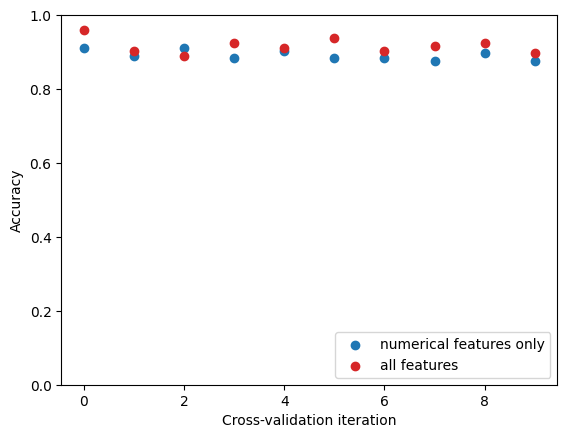

In [11]:
import numpy as np
import matplotlib.pyplot as plt

indices = np.arange(len(scores_num))
plt.scatter(
    indices, scores_num, color="tab:blue", label="numerical features only"
)
plt.scatter(
    indices,
    scores_all,
    color="tab:red",
    label="all features",
)
plt.ylim((0, 1))
plt.xlabel("Cross-validation iteration")
plt.ylabel("Accuracy")
_ = plt.legend(loc="lower right")

print(
    "A model using all features is better than a"
    " model using only numerical features for"
    f" {sum(scores_all > scores_num)} CV iterations out of 10."
)

We observe that 9 times out of 10, the model based on both numerical and categorical features is better than the model that only uses numerical features.